# Simulating SASE pulses

In [1]:
%matplotlib notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt


### utility functions

In [3]:
def calc_SASE_pulses(central_energy, dE_FWHM, dt_FWHM):
    h_eV_fs = 4.135667696
    samples = int(400.*(dt_FWHM/2.355)*central_energy/h_eV_fs)
    photon_energy = np.linspace(0.,20.*central_energy,num=samples)
    photon_energy_input = np.exp(-(photon_energy-central_energy)**2/2./(dE_FWHM/2.355)**2+2*np.pi*1j*np.random.random(size=samples))
    time = np.fft.fftfreq(samples,d=(20.*central_energy)/samples)*h_eV_fs
    pulse_amplitude = np.exp(-time**2/2./(dt_FWHM/2.355)**2)*np.fft.fft(photon_energy_input)
    spectral_intensity = np.fft.ifft(pulse_amplitude)
    return photon_energy, np.abs(spectral_intensity), time, np.abs(pulse_amplitude)

def plot_SASE_pulses(photon_energy, spectral_intensity, time, pulse_amplitude):
    fig, axs = plt.subplots(1, 2)
    for i in range(number_of_pulses):
        axs[0].plot(photon_energy[i], spectral_intensity[i])
    axs[0].set_xlim(central_energy-2.*dE_FWHM,central_energy+2.*dE_FWHM)
    axs[0].set_title('spectrum') 
    axs[0].set_xlabel('photon energy [eV]')
    axs[0].set_ylabel('spectral intensity')

    for i in range(number_of_pulses):
        axs[1].plot(time[i], pulse_amplitude[i])
    axs[1].set_xlim(-2.*dt_FWHM,+2.*dt_FWHM)
    axs[1].set_xlabel('time [fs]')
    axs[1].set_ylabel('pulse amplitude')
    axs[1].set_title('time structure')

    plt.show()


### set parameters

In [4]:
central_energy = 80.                # central energy in eV
energy_bandwidth = 0.5              # energy bandwidth in %
dt_FWHM = 30.                       # FWHM of the average temporal duration

number_of_pulses = 3

### calculate

In [5]:
dE_FWHM = central_energy/100 *energy_bandwidth        
photon_energy, spectral_intensity, time, pulse_amplitude = [], [], [], []

for i in range(number_of_pulses):
    for x, lst in zip(calc_SASE_pulses(central_energy, dE_FWHM, dt_FWHM),
                      [photon_energy, spectral_intensity, time, pulse_amplitude]):
        lst.append(x)

### plot

<IPython.core.display.Javascript object>


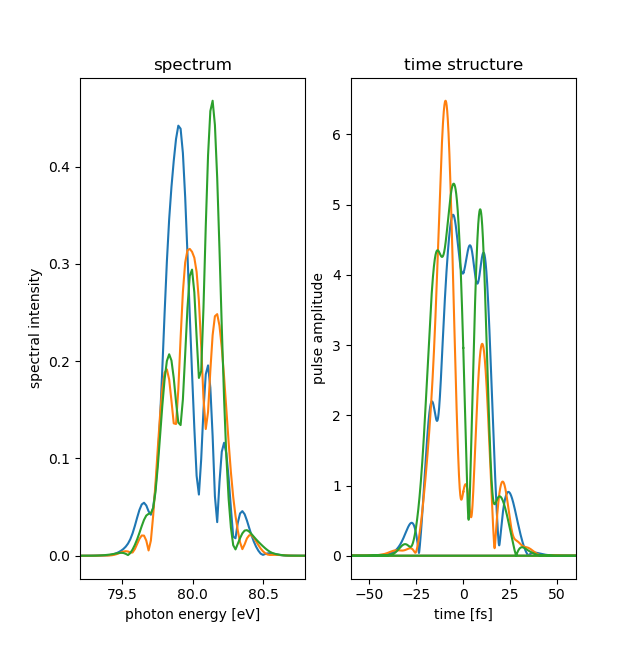

In [6]:
plot_SASE_pulses(photon_energy, spectral_intensity, time, pulse_amplitude)